In [1]:
from tensorflow.keras.models import load_model

model = load_model("model.keras")

In [3]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(256, 256)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR
    image = cv2.resize(image, target_size)
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)  # add channel
    image = np.expand_dims(image, axis=0)   # add batch
    return image

In [10]:
img_path = "mj.jpeg"
input_image = preprocess_image(img_path)


In [11]:
pred_mask = model.predict(input_image)[0]  # remove batch
pred_mask = (pred_mask > 0.5).astype(np.uint8).squeeze()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


In [12]:
pred_mask.shape

(256, 256)

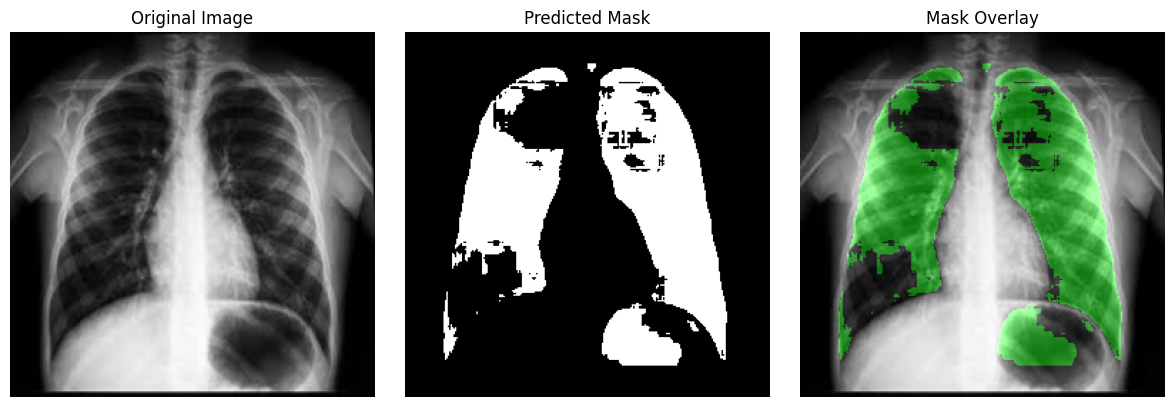

In [13]:
import matplotlib.pyplot as plt

# Load original image for display
original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (256, 256))

# Overlay function
def overlay_mask(image, mask, alpha=0.4):
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    color_mask = np.zeros_like(image)
    color_mask[:, :, 1] = mask * 255  # green overlay
    blended = cv2.addWeighted(image, 1, color_mask, alpha, 0)
    return blended

overlay = overlay_mask(original, pred_mask)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Mask Overlay")
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import cv2
import numpy as np

# Find contours (connected components)
contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get bounding box of the largest contour
if contours:
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))

In [15]:
# original should be your original grayscale or RGB image, resized to match input
lung_crop = original[y:y+h, x:x+w]


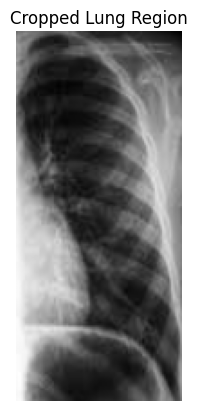

In [16]:
import matplotlib.pyplot as plt

plt.imshow(lung_crop, cmap='gray')
plt.title("Cropped Lung Region")
plt.axis('off')
plt.show()


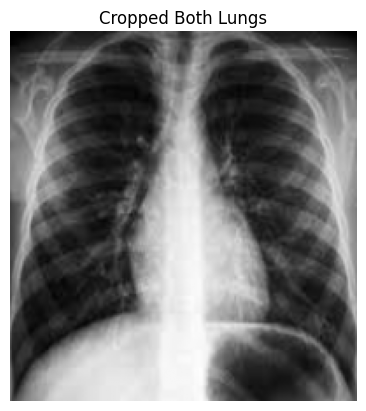

In [17]:
import cv2
import numpy as np

# Assume pred_mask is your binary mask (shape HxW, values 0 or 1)
# Find all contours in the mask
contours, _ = cv2.findContours(pred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new blank mask and draw all contours on it
full_mask = np.zeros_like(pred_mask)
cv2.drawContours(full_mask, contours, -1, 1, thickness=cv2.FILLED)

# Find bounding box around all lungs combined
ys, xs = np.where(full_mask == 1)

if len(xs) > 0 and len(ys) > 0:
    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    # Crop original image to that bounding box
    lung_crop = original[y_min:y_max, x_min:x_max]

    # Display result
    import matplotlib.pyplot as plt
    plt.imshow(lung_crop, cmap='gray')
    plt.title("Cropped Both Lungs")
    plt.axis('off')
    plt.show()
else:
    print("No lung regions detected.")


In [19]:
masked_image = original * pred_mask

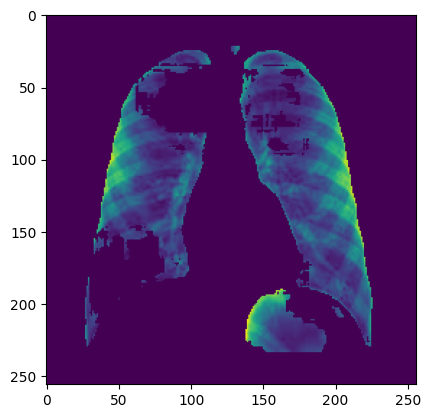

In [20]:
plt.imshow(masked_image)

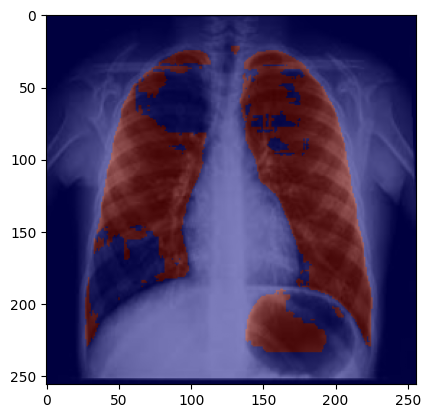

In [21]:
plt.imshow(original, cmap='gray')
plt.imshow(pred_mask, cmap='jet', alpha=0.5)
